In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
import glob
import os

### Download test file SM

In [1]:
import cdsapi
from calendar import monthrange
import numpy as np
import os

years = np.arange(1989,2022).astype(str)
for year in ['1959']:
    print(year)
    path_output = f'/glade/work/jhayron/Weather_Regimes/ERA5/SL/'

    c = cdsapi.Client()
    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': [
                'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2',
                'volumetric_soil_water_layer_3',
            ],
            'area': [
                70, -150, 10,
                -40,
            ],
            'time': [
                '00:00',
            ],
            'day': [
                '01',
            ],
            'month': [
                '01',
            ],
            'year': year,
        },
        f'{path_output}ERA5_SL_SOIL_{year}.nc')

1959


2022-10-15 14:15:11,662 INFO Welcome to the CDS
2022-10-15 14:15:11,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-10-15 14:15:11,916 INFO Request is queued
2022-10-15 14:15:13,069 INFO Request is running
2022-10-15 14:15:14,723 INFO Request is completed
2022-10-15 14:15:14,724 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/adaptor.mars.internal-1665864913.29116-2347-18-56be3b16-9397-4e57-9bb8-a88c3a9826bb.nc to /glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SOIL_1959.nc (627K)
2022-10-15 14:15:16,573 INFO Download rate 339.3K/s


In [15]:
dataset_temp = xr.open_dataset('/glade/work/jhayron/Weather_Regimes/ERA5/Daily_1degree/U10/U10_2010_01_01.nc')

In [10]:
import matplotlib.pyplot as plt

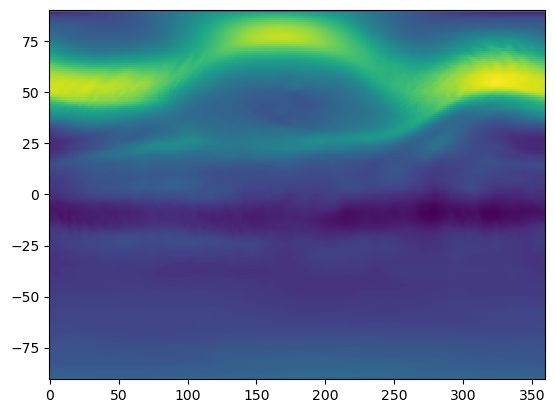

In [16]:
plt.pcolormesh(dataset_temp.lon,dataset_temp.lat,dataset_temp.u)

# Resample SM

In [8]:
path_files =  f'/glade/work/jhayron/Weather_Regimes/ERA5/SL/'
files_geop = glob.glob(f'{path_files}ERA5_SL_SOIL_*.nc')
path_output_daily =  f'/glade/work/jhayron/Weather_Regimes/ERA5/Daily/SM/'

In [9]:
for file in files_geop:
    print(file)
    dataset_temp_hourly = xr.open_dataset(file)
    dates_hourly = pd.to_datetime(dataset_temp_hourly.time).date
    dates_daily = np.unique(dates_hourly)

    for date in dates_daily:
        dataset_temp_daily = dataset_temp_hourly.isel(time=np.where(dates_hourly == date)[0]).mean('time')
        dataset_temp_daily['swvl'] = (dataset_temp_daily.swvl1 + dataset_temp_daily.swvl1 + dataset_temp_daily.swvl1) / 3
        dataset_temp_daily.drop_vars(['swvl1','swvl2','swvl3'])
        date_str = str(date).replace('-','_')
        # units: m**3 m**-3
        dataset_temp_daily.to_netcdf(f'{path_output_daily}SM_{date_str}.nc')
    os.remove(file)

# Compare Skin temperature and SST

In [2]:
import matplotlib.pyplot as plt

In [3]:
path_files =  f'/glade/work/jhayron/Weather_Regimes/ERA5/SL/'
files_geop = glob.glob(f'{path_files}ERA5_SL*.nc')
# path_output_daily =  f'/glade/work/jhayron/Weather_Regimes/ERA5/Daily/SM/'

In [4]:
dataset_temp_hourly = xr.open_dataset(files_geop[0])

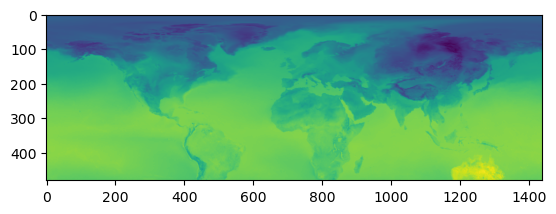

In [5]:
plt.imshow(dataset_temp_hourly.skt.values[0])

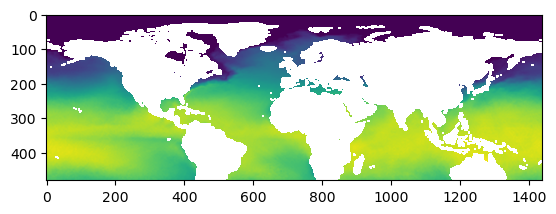

In [6]:
plt.imshow(dataset_temp_hourly.sst.values[0])

In [7]:
where_nonan = np.where(np.isfinite(dataset_temp_hourly.sst[0]))

In [10]:
dataset_temp_hourly.sst[0].values[where_nonan]

array([271.46027, 271.46027, 271.46027, ..., 295.65286, 295.52087,
       295.43234], dtype=float32)

In [11]:
sst_nonan = dataset_temp_hourly.sst[0].values[where_nonan]
skt_ocean = dataset_temp_hourly.skt[0].values[where_nonan]

(250.0, 310.0)

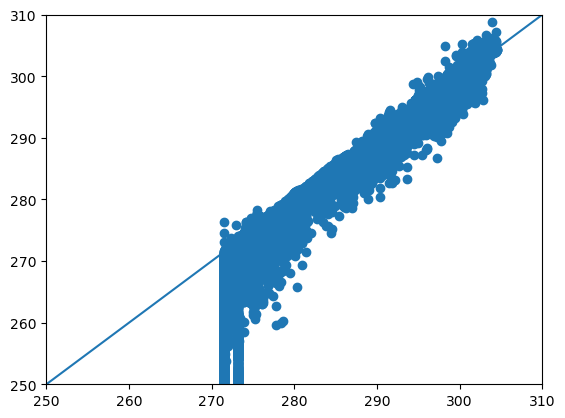

In [14]:
plt.scatter(sst_nonan,skt_ocean)
plt.plot([0,1000],[0,1000])
plt.xlim(250,310)
plt.ylim(250,310)

In [17]:
sst_nonan.min()

271.46027

In [18]:
skt_ocean.min()

226.5492

# Resample SST

In [9]:
path_files =  f'/glade/work/jhayron/Weather_Regimes/ERA5/SL/'
files_geop = glob.glob(f'{path_files}ERA5_SL_SST_*.nc')
path_output_daily =  f'/glade/work/jhayron/Weather_Regimes/ERA5/Daily/SST/'

In [10]:
for file in files_geop:
    print(file)
    dataset_temp_hourly = xr.open_dataset(file)
    dates_hourly = pd.to_datetime(dataset_temp_hourly.time).date
    dates_daily = np.unique(dates_hourly)

    for date in dates_daily:
        dataset_temp_daily = dataset_temp_hourly.isel(time=np.where(dates_hourly == date)[0]).mean('time')
        date_str = str(date).replace('-','_')
        # units: K
        dataset_temp_daily.to_netcdf(f'{path_output_daily}SST_{date_str}.nc')
    os.remove(file)

/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2008.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2016.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2021.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2011.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2014.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2013.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2007.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2017.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2002.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2003.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2019.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2020.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2009.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2005.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_SST_2012.nc
/glade/work/jhayron/Weather_Regimes/ERA5

# Resample OLR

In [13]:
path_files =  f'/glade/work/jhayron/Weather_Regimes/ERA5/SL/'
files_geop = glob.glob(f'{path_files}ERA5_SL_OLR_*.nc')
path_output_daily =  f'/glade/work/jhayron/Weather_Regimes/ERA5/Daily/OLR/'

In [14]:
for file in files_geop:
    print(file)
    dataset_temp_hourly = xr.open_dataset(file)
    dates_hourly = pd.to_datetime(dataset_temp_hourly.time).date
    dates_daily = np.unique(dates_hourly)

    for date in dates_daily:
        dataset_temp_daily = dataset_temp_hourly.isel(time=np.where(dates_hourly == date)[0]).mean('time')
        date_str = str(date).replace('-','_')
        # units: J m**-2/Top net thermal radiation
        dataset_temp_daily.to_netcdf(f'{path_output_daily}OLR_{date_str}.nc')
    os.remove(file)

/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2015.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2005.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2009.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2004.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2011.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2014.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2007.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2012.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2010.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2019.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2006.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2002.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2008.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2016.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_OLR_2018.nc
/glade/work/jhayron/Weather_Regimes/ERA5

# Resample ST

In [2]:
path_files =  f'/glade/work/jhayron/Weather_Regimes/ERA5/SL/'
files_geop = glob.glob(f'{path_files}ERA5_SL_ST_*.nc')
path_output_daily =  f'/glade/work/jhayron/Weather_Regimes/ERA5/Daily/ST/'

In [ ]:
for file in files_geop:
    print(file)
    dataset_temp_hourly = xr.open_dataset(file)
    dates_hourly = pd.to_datetime(dataset_temp_hourly.time).date
    dates_daily = np.unique(dates_hourly)

    for date in dates_daily:
        dataset_temp_daily = dataset_temp_hourly.isel(time=np.where(dates_hourly == date)[0]).mean('time')
        date_str = str(date).replace('-','_')
        # units: m**3 m**-3
        dataset_temp_daily.to_netcdf(f'{path_output_daily}ST_{date_str}.nc')
    os.remove(file)

/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2007.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2015.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2003.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2008.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2016.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2014.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2018.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2021.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2005.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2010.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2020.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2012.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2019.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2013.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_2004.nc
/glade/work/jhayron/Weather_Regimes/ERA5/SL/ERA5_SL_ST_